# Face recognition
Task is to recognize  faces

In [1]:
import tensorflow
tensorflow.__version__

'2.8.0'

In [2]:
from zipfile import ZipFile
with ZipFile('ComputerVision.zip') as zip:
  zip.extractall()

### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [3]:
import numpy as np
import os

In [4]:
### Function to load images
### - Define a function to load the images from the extracted folder and map each image with person id 

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)



In [6]:
# metadata = load_metadata('images')
metadata = load_metadata('C:/Users/Administrator/Downloads/ComputerVision/Computer Vision/Dataset/images/images')

In [7]:
metadata

array([C:/Users/Administrator/Downloads/ComputerVision/Computer Vision/Dataset/images/images\0\image_0001.jpg,
       C:/Users/Administrator/Downloads/ComputerVision/Computer Vision/Dataset/images/images\0\image_0002.jpg,
       C:/Users/Administrator/Downloads/ComputerVision/Computer Vision/Dataset/images/images\0\image_0003.jpg,
       C:/Users/Administrator/Downloads/ComputerVision/Computer Vision/Dataset/images/images\0\image_0004.jpg,
       C:/Users/Administrator/Downloads/ComputerVision/Computer Vision/Dataset/images/images\0\image_0005.jpg,
       C:/Users/Administrator/Downloads/ComputerVision/Computer Vision/Dataset/images/images\0\image_0006.jpg,
       C:/Users/Administrator/Downloads/ComputerVision/Computer Vision/Dataset/images/images\0\image_0007.jpg,
       C:/Users/Administrator/Downloads/ComputerVision/Computer Vision/Dataset/images/images\0\image_0008.jpg,
       C:/Users/Administrator/Downloads/ComputerVision/Computer Vision/Dataset/images/images\0\image_0009.jpg,
 

In [ ]:
pip install opencv-python

### Defining a function

In [8]:
import cv2
def load_image(path):
    img=cv2.imread(path,1)
    #0 is grayscale 1 is color
    #OpenCv loads images with color channels
    return img[...,::-1]# in BGR order, so we need to reverse them
#cv2, imread() method loads an image from specified file
#cv is an old version

### Load a sample image

Load one image using function "load_image"

In [9]:
load_image(metadata[0].image_path())

array([[[ 82,  75,  65],
        [ 67,  63,  52],
        [ 77,  74,  65],
        ...,
        [150, 146, 145],
        [152, 148, 145],
        [170, 166, 163]],

       [[ 82,  75,  67],
        [ 72,  68,  59],
        [ 89,  86,  77],
        ...,
        [150, 146, 143],
        [151, 147, 144],
        [169, 165, 162]],

       [[ 84,  79,  73],
        [ 80,  75,  69],
        [ 83,  80,  73],
        ...,
        [149, 146, 141],
        [150, 147, 142],
        [168, 165, 160]],

       ...,

       [[130, 136, 122],
        [130, 136, 122],
        [137, 143, 129],
        ...,
        [ 48,  66,  90],
        [ 38,  56,  80],
        [ 32,  50,  74]],

       [[136, 139, 128],
        [132, 135, 124],
        [133, 137, 123],
        ...,
        [ 54,  70,  95],
        [ 49,  65,  90],
        [ 20,  36,  61]],

       [[135, 138, 127],
        [134, 137, 126],
        [132, 136, 122],
        ...,
        [ 53,  67,  93],
        [ 54,  68,  94],
        [ 33,  47,  73]]

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

In [11]:
def vgg_face():
    model=Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224,3)))
    model.add(Convolution2D(64,(3,3),activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64,(3,3),activation='relu'))
    model.add(MaxPooling2D((2,2) ,strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128,(3,3),activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128,(3,3),activation='relu'))
    model.add(MaxPooling2D((2,2) ,strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256,(3,3),activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256,(3,3),activation='relu'))
    model.add(ZeroPadding2D((1,1)))  
    model.add(Convolution2D(256,(3,3),activation='relu'))
    model.add(MaxPooling2D((2,2) ,strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512,(3,3),activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512,(3,3),activation='relu'))
    model.add(ZeroPadding2D((1,1)))  
    model.add(Convolution2D(512,(3,3),activation='relu'))
    model.add(MaxPooling2D((2,2) ,strides=(2,2)))
    
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512,(3,3),activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512,(3,3),activation='relu'))
    model.add(ZeroPadding2D((1,1)))  
    model.add(Convolution2D(512,(3,3),activation='relu'))
    model.add(MaxPooling2D((2,2) ,strides=(2,2)))
    
    model.add(Convolution2D(4096,(7,7),activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096,(1,1),activation='relu'))
    model.add(Dropout(0.5))  
    model.add(Convolution2D(2622,(1,1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model
    

### Load the model

In [12]:
### Get vgg_face_descriptor

In [13]:
from tensorflow.keras.models import model_from_json
model = vgg_face()
model.load_weights('vgg_face_weights.h5')

In [14]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

### Generate embeddings for each image in the dataset

In [15]:
### Get embedding vector for first image in the metadata using pretrained model
img_path=metadata[0].image_path()
img=load_image(img_path)

### Normalizing pixel values from 0-225 to 0-1: Scale RGB values to interval[0,1]
img=(img/255.).astype(np.float32)

img=cv2.resize(img,dsize=(224,224))
print(img.shape)

### obtain embedding vector for an image
### get embedding vector for the above image using vgg_face_descriptor model and print

embedding_vector=vgg_face_descriptor.predict(np.expand_dims(img,axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


### Generate embeddings for all images

write code to iterate through metadata amd create embeddings for each image using vgg_face_descriptor.predict() and store in a list with name embeddings 
If there is any error in reading any iamge in the dataset fill the embedding vector of the image with 2622 final embeddings from the model is of length 2622

In [16]:
embeddings= np.zeros((metadata.shape[0],2622))
for i,m in enumerate(metadata):
    try:
        img=load_image(m.image_path())
        ## scale RGB values to interval [0,1]
        img = cv2.resize(img,dsize=(224,224))
        img= (img/255.).astype(np.float32)
        ## obtain embedding vector for image
        embeddings[i]=vgg_face_descriptor.predict(np.expand_dims(img,axis=0))[0]
    except Exception as e:
        print(str(e))
        print(i,m)

### Function to calculate distance between given 2 pairs of images
* consider distance metric as "squared l2 distance"
* square l2 distance between two points (x1,y1) and (x2,y2) = (x1-x2)^2 + (y1-y2)^2

In [17]:
def distance (emb1,emb2):
    return np.sum(np.square(emb1-emb2))

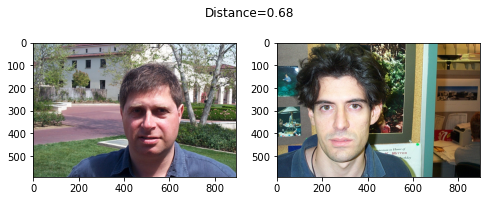

In [18]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

def show_pair(idx1,idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance={distance(embeddings[idx1],embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));
    
    
show_pair(20,100)

In [19]:
train_idx = np.arange(metadata.shape[0])%9!=0
test_idx = np.arange(metadata.shape[0])%9==0
# 1 half as train examples of 10 identities
X_train= embeddings[train_idx]
# another half as train examples of 10 identities
X_test= embeddings[test_idx]

targets = np.array([m.name for m in metadata])
y_train = targets[train_idx]
y_test = targets[test_idx]

### Encode the labels

In [20]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

## numerical encoding of identities

y_train=encoder.fit_transform(y_train)
y_test=encoder.transform(y_test)

### Standardize the feature values

In [21]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### Reduce the dimension using PCA

In [22]:
from sklearn.decomposition import PCA

pca=PCA(n_components=128,svd_solver="randomized",whiten=True)

X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

### Build a Classifier

* use svm classifier to predict the person in the given image
* fit the classifier and print the score

In [23]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf',class_weight=None, C=1000, gamma='auto')
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9565217391304348

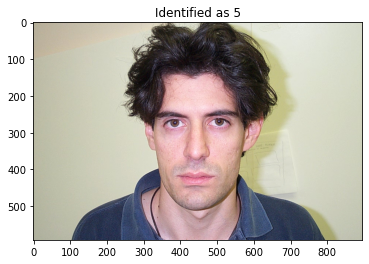

In [26]:
import warnings
warnings.filterwarnings("ignore")

example_idx = 10

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction= clf.predict([X_test[example_idx]])
example_identity = encoder.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');